## Observations and Insights

## Dependencies and starter code

OBSERVATIONS:
    1) Only Ramicane and Capomulin appear to have a strong effect leading to a decrease in tumor volume.
    2) There is a roughly equal distribution of male and female mice
    3) Of the four most promising regimens, there was only 1 outlier, meaning the quality of data is strong.

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

combined_df = mouse_metadata.merge(study_results, on='Mouse ID')



## Summary statistics

In [73]:
# Generate a summary statistics table of mean, median, 
# variance, standard deviation, and SEM of the tumor volume for each regimen

# Group the df by Drug Regimen and assigns values to for the mean, median, etc.
regimen_df = combined_df.groupby("Drug Regimen")
regimen_means = regimen_df["Tumor Volume (mm3)"].mean()
regimen_medians = regimen_df["Tumor Volume (mm3)"].median()
regimen_var = regimen_df["Tumor Volume (mm3)"].var()
regimen_stdev = regimen_df["Tumor Volume (mm3)"].std()
regimen_sem = regimen_df["Tumor Volume (mm3)"].sem()

# Create a dcittionary for all the values and labels
summary_data = {'Mean Tumor Volume (mm3)' : regimen_means,
                'Median Tumor Volume (mm3)': regimen_medians,
                'Variance of Tumor Volume (mm3)': regimen_var,
                'Standard Deviation of Tumor Volume (mm3)': regimen_stdev,
                'Standard Error of Tumor Volume (mm3)': regimen_sem
                }

# Create a df and print the results
summary_df = pd.DataFrame(summary_data)
summary_df


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),Standard Error of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

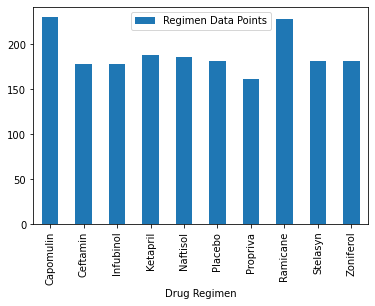

In [74]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Assign regimen counts from the grouped df
regimen_counts = regimen_df['Sex'].count()

# Create a new df with just the count of data points by Drug Regimen
regimen_counts_df = pd.DataFrame({'Regimen Data Points' : regimen_counts})

# Plot the new df as a bar chart
regimen_counts_df.plot.bar()
plt.show()

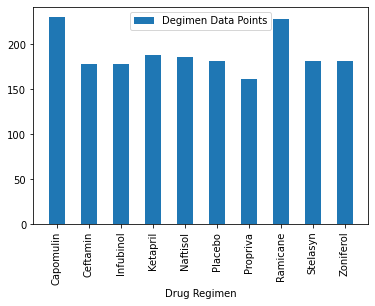

In [75]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Plot the bar chart using the df index values and counts
plt.bar(regimen_counts_df.index, regimen_counts, width = 0.5)

# Orient the xticks to be verical
plt.xticks(rotation="vertical")

# Add the legend to the plot
plt.legend(("Degimen Data Points",), loc = 'upper center',  prop={'size': 10})

# Add an xlabel for the Drug Regimen
plt.xlabel("Drug Regimen")
plt.show()

## Pie plots

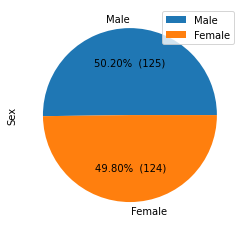

In [76]:
# Create a function to pass in the pie chart so we can see that actual values
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Drop duplicate rows for the same mouse, index the sex and count the values and assign to a variable
pie_values = combined_df.drop_duplicates("Mouse ID")['Sex'].value_counts()

# Create a new df for the sex values
sex_df = pd.DataFrame({'Sex' : pie_values})


# Plot the df using .plot.pie and passing the function to autopct
sex_df.plot.pie(subplots = True, autopct=make_autopct(sex_df['Sex']))
plt.show()


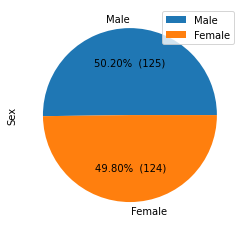

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Assign the values of the df to a variable
values= combined_df.drop_duplicates("Mouse ID")['Sex'].value_counts()

# Plot the pie chart using the passed values, assign labels, and formatting function to autopct
plt.pie(values, labels = ("Male", "Female"),autopct=make_autopct(values))

# Add a label and legend and show the pie chart
plt.ylabel("Sex")
plt.legend(loc="best")
plt.show()

## Quartiles, outliers and boxplots

In [78]:
# Identify the four most promising drug regimens

# Change the pd max display rows
pd.options.display.max_rows = 50

# Filter the df for rows only with timepoint == 45 and a create a new df grouped by Drug regimen
vol_df = combined_df.drop_duplicates(subset ="Mouse ID", keep = 'last').groupby("Drug Regimen")

# Identify the four drug regimens with the smallest final tumor volumes
vol_df['Tumor Volume (mm3)'].mean().nsmallest(4)

Drug Regimen
Ramicane     36.191390
Capomulin    36.667568
Propriva     56.736964
Ceftamin     57.753977
Name: Tumor Volume (mm3), dtype: float64

In [79]:
# Create a new df with just the most effective regimens
best_regimens_df = combined_df.loc[(combined_df['Drug Regimen'] == 'Ramicane') | 
                                   (combined_df['Drug Regimen'] == 'Capomulin') |
                                   (combined_df['Drug Regimen'] == 'Ceftamin') |
                                   (combined_df['Drug Regimen'] == 'Infubinol')
                                  ]

# Create a new df with just the final timepoint for each mouse in the most effective regimens
best_regimens_df_45 = best_regimens_df.drop_duplicates(subset ="Mouse ID", keep = 'last')

# Assign the final values of tumor voluem for each regimen to a series
Ramicane_final_vol = best_regimens_df_45.loc[(best_regimens_df_45['Drug Regimen'] == 'Ramicane')]['Tumor Volume (mm3)']
Capomulin_final_vol = best_regimens_df_45.loc[(best_regimens_df_45['Drug Regimen'] == 'Capomulin')]['Tumor Volume (mm3)']
Ceftamin_final_vol = best_regimens_df_45.loc[(best_regimens_df_45['Drug Regimen'] == 'Ceftamin')]['Tumor Volume (mm3)']
Infubinol_final_vol = best_regimens_df_45.loc[(best_regimens_df_45['Drug Regimen'] == 'Infubinol')]['Tumor Volume (mm3)']


In [80]:
# Print a summary of the regimen quartiles, median, IQR, Upper and Lower bounds, and possible outliers

# Iterate through each of the drug regimens and + 1 to run 
run = 1
for i in [Ramicane_final_vol, Capomulin_final_vol, Ceftamin_final_vol, Infubinol_final_vol]:
    if run == 1:
        print("Ramicane")
        run = run + 1
    elif run == 2:
        print("Capomulin")
        run = run + 1
    elif run == 3:
        print("Ceftamin")
        run = run + 1
    elif run == 4:
        print("Infubinol")
        run = run + 1
        
    # Identify the quartiles and IQR
    quartiles = i.quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    iqr = round(upperq-lowerq, 2)
    
    # Print the results
    print("**********************")
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The the median is: {round(quartiles[0.5],)} ")
    
    #Identify and print the upper and lower bounds 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound,2)} could be outliers.")
    print(f"Values above {round(upper_bound,2)} could be outliers.")
    
    # Identify and print any potential outliers for each of the datasets
    outlier_count = 0
    for j in i:
        if (j < lower_bound) | (j > upper_bound):
            print(f"{j} is an outlier")
            outlier_count = outlier_count + 1
    print(f"There were a total of {outlier_count} outliers identified.")
    print("**********************")

Ramicane
**********************
The lower quartile is: 31.56
The upper quartile is: 40.66
The interquartile range is: 9.1
The the median is: 37.0 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
There were a total of 0 outliers identified.
**********************
Capomulin
**********************
The lower quartile is: 32.38
The upper quartile is: 40.16
The interquartile range is: 7.78
The the median is: 38.0 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
There were a total of 0 outliers identified.
**********************
Ceftamin
**********************
The lower quartile is: 48.72
The upper quartile is: 64.3
The interquartile range is: 15.58
The the median is: 60.0 
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.
There were a total of 0 outliers identified.
**********************
Infubinol
**********************
The lower quartile is: 54.05
The upper quartile is: 65.53
The interquartile range is: 11.48

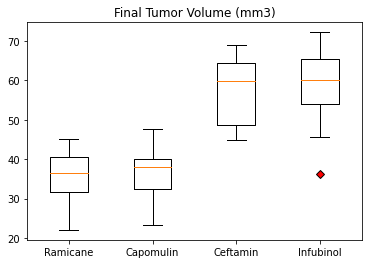

In [81]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

green_diamond = dict(markerfacecolor='r', marker='D')

# Createa a list of the datasets
data = [Ramicane_final_vol, Capomulin_final_vol, Ceftamin_final_vol, Infubinol_final_vol]

# Chart the box plot and set title, outlier format and x ticks
fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volume (mm3)')
ax7.boxplot(data, flierprops=green_diamond)
plt.xticks([1, 2, 3, 4], ['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol'])

plt.show()

# NOTE: There was only 1 outlier identified

## Line and scatter plots

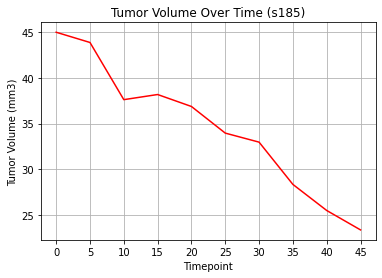

In [82]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Create a new df for a single mouse
s185_df = combined_df.loc[(combined_df['Mouse ID'] == 's185')]

# Plot the df using the timepoint column and tumor volume column
plt.plot(s185_df['Timepoint'], s185_df['Tumor Volume (mm3)'], color="red", label="Danger Drop")

# Add labels to X and Y axes :: Add title
plt.title("Tumor Volume Over Time (s185)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(s185_df['Timepoint'])
plt.grid()

plt.show()

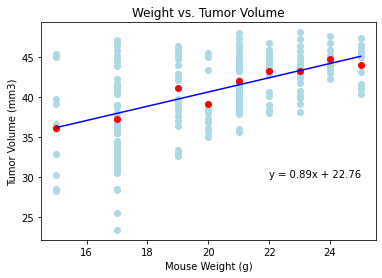

In [83]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Create a new df for Capomulin
capomulin_df = combined_df.loc[(combined_df['Drug Regimen'] == 'Capomulin')]
x = capomulin_df['Weight (g)'].drop_duplicates()

# Create a two scatter plots: One for all the values and the other for the means by weight
plt.scatter(capomulin_df['Weight (g)'],capomulin_df['Tumor Volume (mm3)'], c='lightblue')
plt.scatter(x.nsmallest(len(x)), capomulin_df.groupby('Weight (g)').mean()['Tumor Volume (mm3)'], c='red')


# import dependency
from scipy.stats import linregress

# Set values and pass into the linear regression function
x_values = x.nsmallest(len(x))
y_values = capomulin_df.groupby('Weight (g)').mean()['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the linear regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression line
plt.plot(x_values,regress_values,"r-", c='blue')
plt.annotate(line_eq,(22,30), color="black")

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs. Tumor Volume")

plt.show()